# Example Usage for YoloSegmentation

## Load Model

In [1]:
%reset -f
import cv2
import matplotlib.pyplot as plt
from util.YoloModel import YoloSegmentation

yolo_model = YoloSegmentation(r"models\yolo11n-seg.pt")
print(f"Training imgsz: {yolo_model.training_imgsz}")

Warming up the model...
Warm-up complete.
Training imgsz: 640


## Single Inference

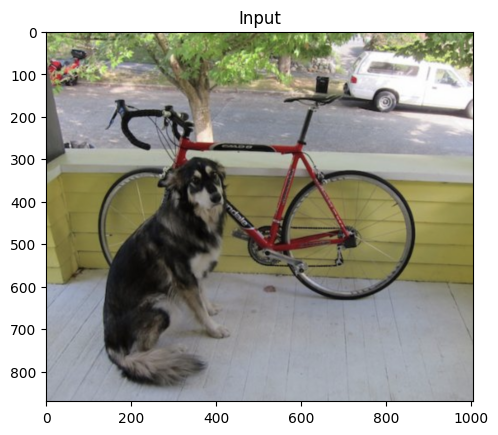

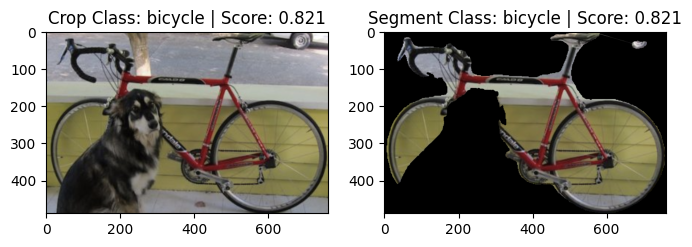

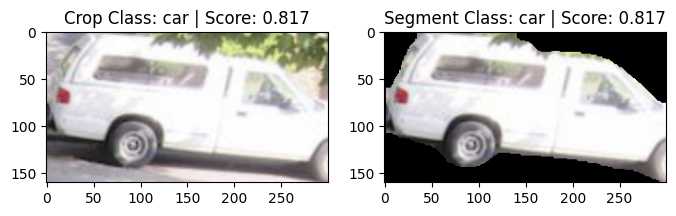

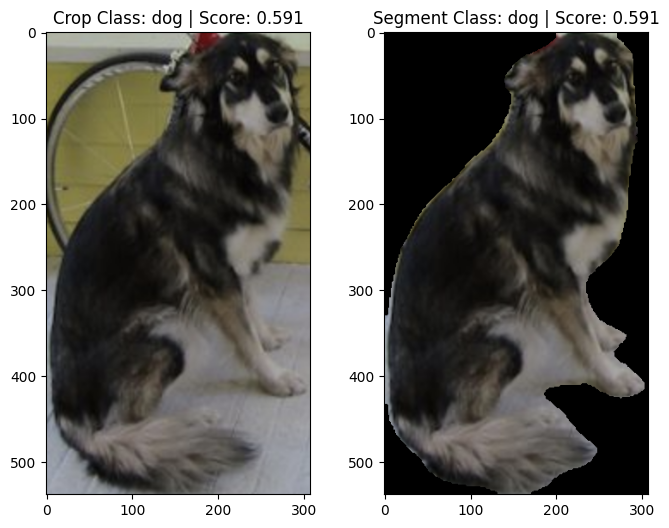

In [2]:
image = cv2.imread(r"images\detect\multiple1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_with_bbox = image.copy()

plt.imshow(image)
plt.title(f"Input")
plt.show()

results = yolo_model.predict(image)
for box, mask, score, cls_name in yolo_model.decode_results(results):
    
    # Crop and plot
    crop_image = yolo_model.extract_object(image, box, 0)
    plt.figure(figsize=(8, 6))
    plt.subplot(1,2,1)
    plt.imshow(crop_image)
    plt.title(f"Crop Class: {cls_name} | Score: {score:.3f}")

    segment_image = yolo_model.segment_object(image, box, mask, 0)
    plt.subplot(1,2,2)
    plt.imshow(segment_image)
    plt.title(f"Segment Class: {cls_name} | Score: {score:.3f}")
    plt.show()



## Batch Inference

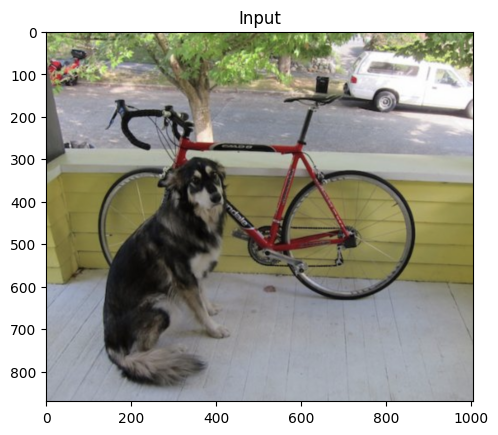

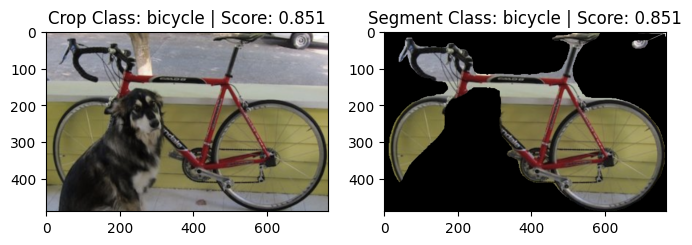

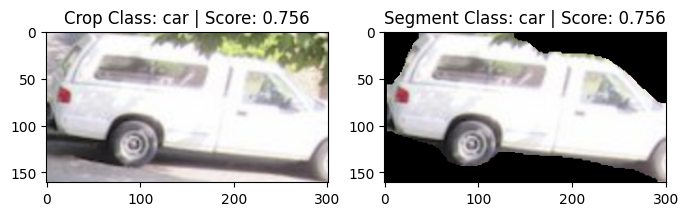

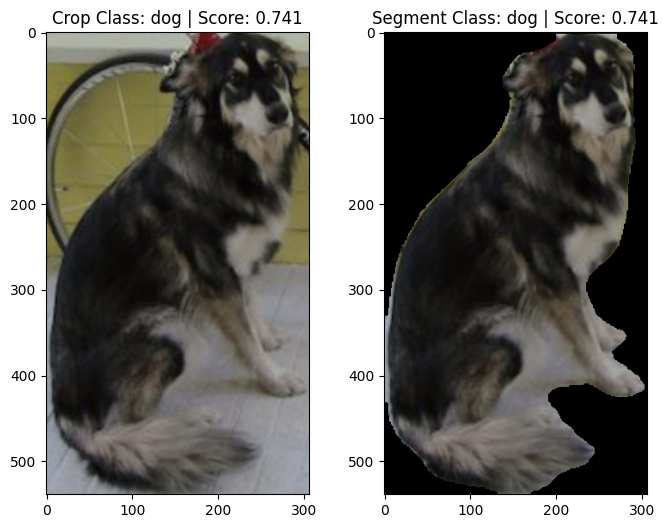

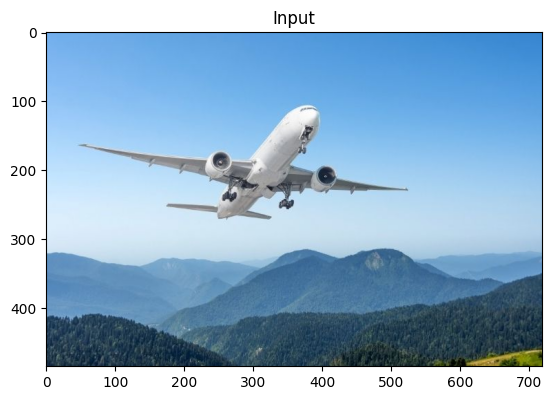

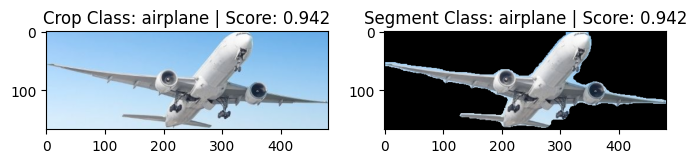

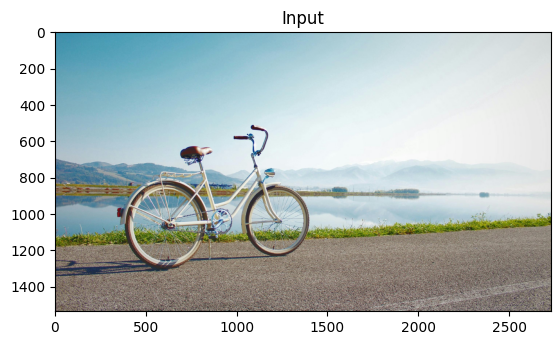

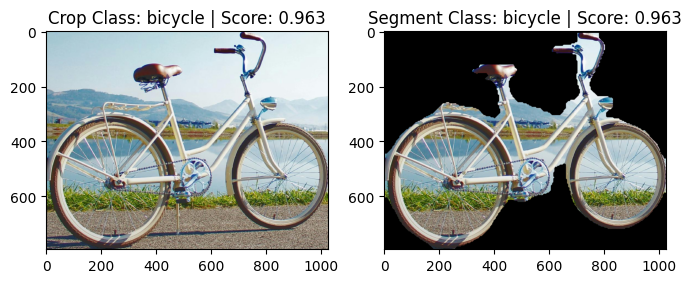

In [3]:
image_list = [
    cv2.imread(r"images\detect\multiple1.png"),
    cv2.imread(r"images\detect\airplane.jpg"),
    cv2.imread(r"images\detect\bicycle.jpg"),
]

results = yolo_model.predict(image_list)
decode_results = yolo_model.decode_results(results)

for image, objects in zip(image_list, decode_results):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_with_bbox = image.copy()
    
    plt.imshow(image)
    plt.title(f"Input")
    plt.show()

    for box, mask, score, cls_name in objects:
        
        # Crop and plot
        crop_image = yolo_model.extract_object(image, box, 0)
        plt.figure(figsize=(8, 6))
        plt.subplot(1,2,1)
        plt.imshow(crop_image)
        plt.title(f"Crop Class: {cls_name} | Score: {score:.3f}")

        segment_image = yolo_model.segment_object(image, box, mask, 0)
        plt.subplot(1,2,2)
        plt.imshow(segment_image)
        plt.title(f"Segment Class: {cls_name} | Score: {score:.3f}")
        plt.show()


    print("=" * 20)